# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(1000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
review       1000 non-null object
sentiment    1000 non-null object
dtypes: object(2)
memory usage: 15.8+ KB
None


,review,sentiment
count,1000,1000
unique,1000,2
top,I don't believe there has ever been a more evi...,positive
freq,1,501


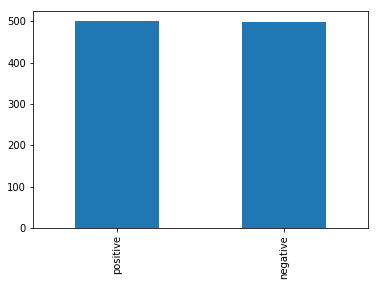

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:1000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:1000]
y_train=imdb_data.sentiment[:1000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

print(cm)
print("Accuracy :" , accuracy)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()

cr = classification_report(y_train, y_pred)
print(cr, cv)

[[499   0]
 [ 21 480]]
Accuracy : 0.979
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98       499
    positive       1.00      0.96      0.98       501

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000
 0.7708844058257185


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)


In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


for i in range (0,len(X_test)) :
        X=X_test[i]
        y=y_pred[i]
        X_train.append(X)
        y_train.append(y)
        
print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

1000
1100

Train Data= 1000 1000
Predicton from train data model ke- 1

Cross validation score: 0.7708844058257185 
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       520
    positive       0.96      1.00      0.98       480

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Confusion Matrix : 
 [[499   0]
 [ 21 480]]
Accuracy : 0.979
__________________________________________________________________________________________________
Train Data= 1000 1000
Test Data= 100 100
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.82      0.80        51
    positive       0.80      0.76      0.78        49

   micro avg       0.79      0.79      0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1
    
    for i in range (0,len(X_test)) :
         if (data_total+i) < 10000:
            X=X_test[i]
            y=y_pred[i]
            X_train.append(X)
            y_train.append(y)
            
    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

1100 1210 1100

Train Data= 1100 1100
Predicton from train data model ke- 2

Cross validation score: 0.7817640943698924 
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       574
    positive       0.96      1.00      0.98       526

   micro avg       0.98      0.98      0.98      1100
   macro avg       0.98      0.98      0.98      1100
weighted avg       0.98      0.98      0.98      1100


Confusion Matrix : 
 [[553   0]
 [ 21 526]]
Accuracy : 0.980909090909091
__________________________________________________________________________________________________
Train Data= 1100 1100
Test Data= 110 110
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.68      0.89      0.77        45
    positive       0.90      0.71      0.79        65

   micro avg       0.78      0.78      0.78       110
   macro avg       0.79      0.80      0.78       110
weighted avg       0.81   


Train Data= 1771 1771
Predicton from train data model ke- 7

Cross validation score: 0.8521204662812867 
               precision    recall  f1-score   support

    negative       1.00      0.95      0.98       986
    positive       0.94      1.00      0.97       785

   micro avg       0.97      0.97      0.97      1771
   macro avg       0.97      0.98      0.97      1771
weighted avg       0.97      0.97      0.97      1771


Confusion Matrix : 
 [[940   1]
 [ 46 784]]
Accuracy : 0.9734613212874083
__________________________________________________________________________________________________
Train Data= 1771 1771
Test Data= 177 177
prediction from test data, model ke- 7
              precision    recall  f1-score   support

    negative       0.72      0.76      0.74        89
    positive       0.75      0.70      0.73        88

   micro avg       0.73      0.73      0.73       177
   macro avg       0.74      0.73      0.73       177
weighted avg       0.74      0.73      0


Train Data= 2850 2850
Predicton from train data model ke- 12

Cross validation score: 0.8833770189892569 
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97      1647
    positive       0.93      1.00      0.96      1203

   micro avg       0.97      0.97      0.97      2850
   macro avg       0.96      0.97      0.97      2850
weighted avg       0.97      0.97      0.97      2850


Confusion Matrix : 
 [[1558    3]
 [  89 1200]]
Accuracy : 0.9677192982456141
__________________________________________________________________________________________________
Train Data= 2850 2850
Test Data= 285 285
prediction from test data, model ke- 12
              precision    recall  f1-score   support

    negative       0.76      0.82      0.79       135
    positive       0.83      0.76      0.79       150

   micro avg       0.79      0.79      0.79       285
   macro avg       0.79      0.79      0.79       285
weighted avg       0.79      0.79 

prediction from test data, model ke- 16
              precision    recall  f1-score   support

    negative       0.69      0.85      0.76      2463
    positive       0.81      0.63      0.71      2537

   micro avg       0.74      0.74      0.74      5000
   macro avg       0.75      0.74      0.74      5000
weighted avg       0.75      0.74      0.73      5000


Confusion Matrix : 
 [[2096  367]
 [ 944 1593]]
Accuracy : 0.7378
__________________________________________________________________________________________________
4588 4588
4588 5046 4588

Train Data= 4588 4588
Predicton from train data model ke- 17

Cross validation score: 0.8963706280518569 
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97      2745
    positive       0.93      0.99      0.96      1843

   micro avg       0.97      0.97      0.97      4588
   macro avg       0.96      0.97      0.97      4588
weighted avg       0.97      0.97      0.97      4588


Confus

prediction from test data, model ke- 21
              precision    recall  f1-score   support

    negative       0.68      0.85      0.75       333
    positive       0.80      0.60      0.69       338

   micro avg       0.73      0.73      0.73       671
   macro avg       0.74      0.73      0.72       671
weighted avg       0.74      0.73      0.72       671


Confusion Matrix : 
 [[283  50]
 [134 204]]
Accuracy : 0.7257824143070045
__________________________________________________________________________________________________
prediction from test data, model ke- 21
              precision    recall  f1-score   support

    negative       0.67      0.85      0.75      2463
    positive       0.80      0.60      0.69      2537

   micro avg       0.72      0.72      0.72      5000
   macro avg       0.74      0.73      0.72      5000
weighted avg       0.74      0.72      0.72      5000


Confusion Matrix : 
 [[2086  377]
 [1006 1531]]
Accuracy : 0.7234
_________________________

In [11]:
print("Fnal Model")

pipe.fit(X_train,y_train)

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")




len(X_train)

Fnal Model
prediction from test data, model ke- 26
              precision    recall  f1-score   support

    negative       0.67      0.84      0.75      2463
    positive       0.80      0.59      0.68      2537

   micro avg       0.72      0.72      0.72      5000
   macro avg       0.73      0.72      0.71      5000
weighted avg       0.73      0.72      0.71      5000


Confusion Matrix : 
 [[2075  388]
 [1028 1509]]
Accuracy : 0.7168
__________________________________________________________________________________________________


10000

# Test

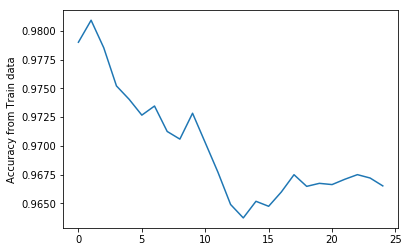

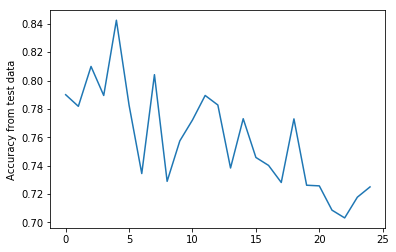

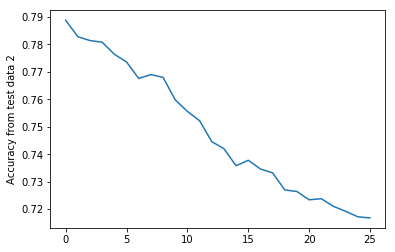

In [12]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()

In [13]:
len(X_train)

10000